21기 POSCO 청년 AI BigData 아카데미
B분반 4조 이수진
# 탐색적 분석 실습

In [27]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from scipy import stats
from statsmodels.stats.proportion import proportions_ztest

import warnings 
warnings.filterwarnings('ignore')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None

(891, 12)

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  891.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.758889    0.523008   
std     257.35384

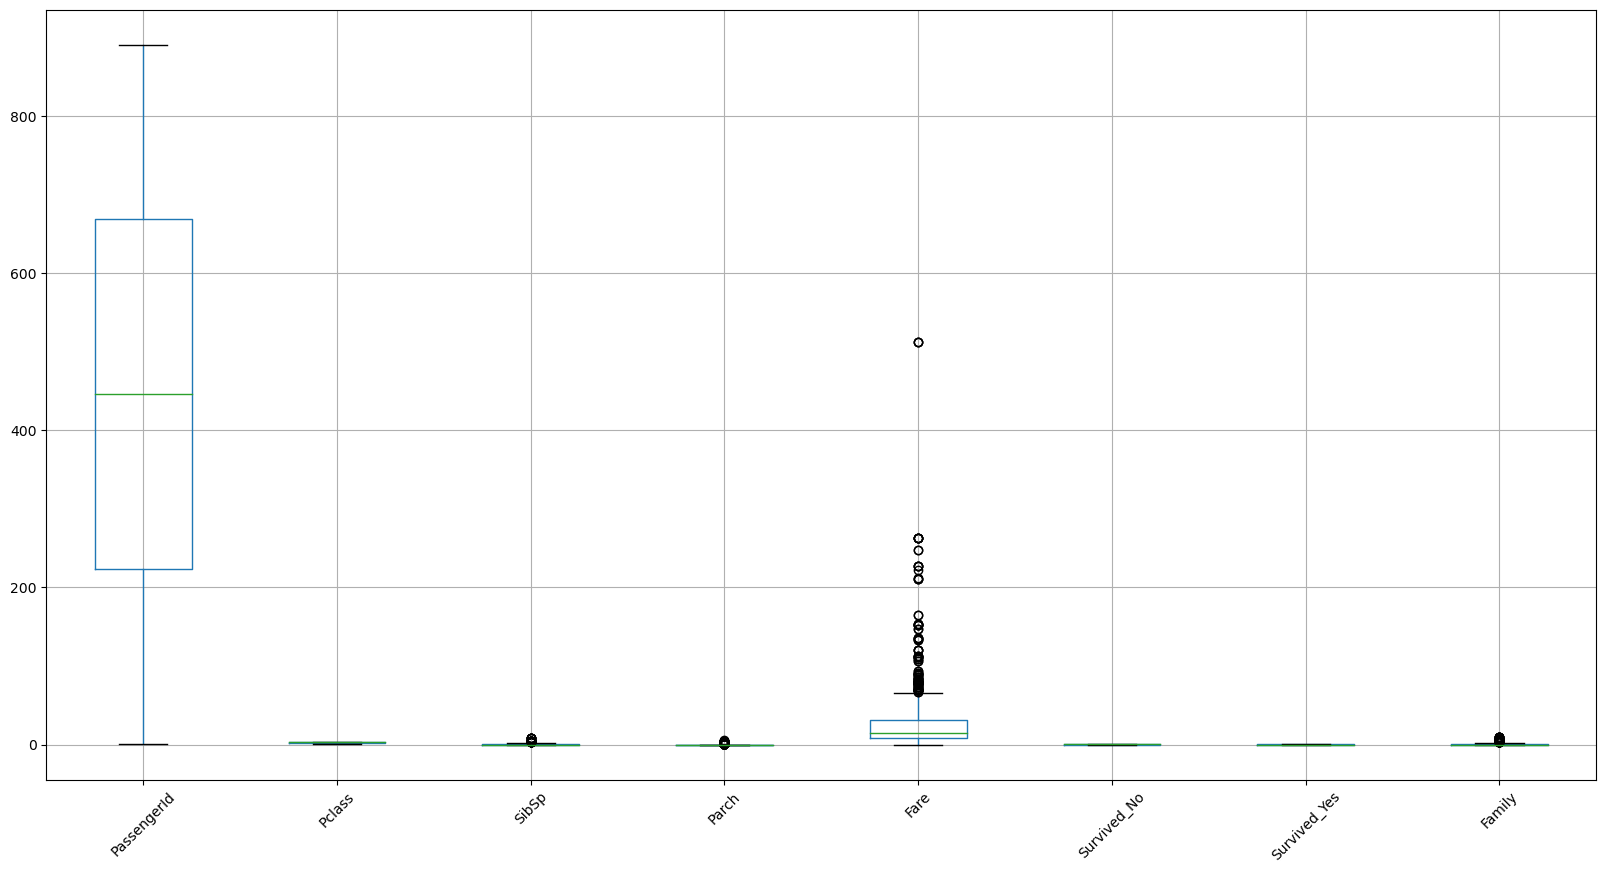

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived_No,Survived_Yes,Family
258,259,1,"Ward, Miss. Anna",female,Middle,0,0,PC 17755,512.3292,C,C,0,1,0
679,680,1,"Cardeza, Mr. Thomas Drake Martinez",male,Middle,0,1,PC 17755,512.3292,B,C,0,1,1
737,738,1,"Lesurer, Mr. Gustave J",male,Middle,0,0,PC 17755,512.3292,B,C,0,1,0


In [56]:
df_titanic = pd.read_csv("/home/piai/python/2주차/실습화일/1 Big Data 분석 기초/titanic.csv", encoding = 'euc-kr')
display(df_titanic.head())

print(df_titanic.info()) #데이터 속성
print()

print(df_titanic.shape) #데이터의 행과 열 형태
print()

print(df_titanic.describe()) #기술통계량
print()

print(df_titanic.isnull().sum()) #결측치 확인

df_titanic = pd.get_dummies(df_titanic, columns = ['Survived'])
df_titanic.rename(columns = {"Survived_0": "Survived_No", "Survived_1": "Survived_Yes"},
                 inplace=True)

#df_titanic['Cabin']의 값을 제일 앞자리 알파벳으로 지정 
df_titanic['Cabin'] = df_titanic['Cabin'].str.get(i=0)

#df_titanic['Cabin']의 결측치를 최빈값으로 대체
mode_cabin = df_titanic['Cabin'].mode()[0]
df_titanic['Cabin'] = df_titanic['Cabin'].fillna(mode_cabin)

#df_titanic['Embarked']의 결측치를 최빈값으로 대체
mode_Embarked = df_titanic['Embarked'].mode()[0]
df_titanic['Embarked'] = df_titanic['Embarked'].fillna(mode_Embarked)


print(df_titanic.isnull().sum()) #결측치 대체 후, 결측치가 남아있는지 확인 

#나이 구간화
def categorize_age(age):
    if age <= 14:
        return "Child"
    elif age <= 28:
        return "Young"
    elif age <= 45:
        return "Middle"
    elif age <= 56:
        return "Prime"
    else:
        return "Old"

df_titanic['Age'] = df_titanic['Age'].apply(categorize_age)

df_titanic['Family'] = df_titanic['Parch'] + df_titanic['SibSp']

#이상치 확인을 위해 상자수염 그래프 작성 
df_titanic.boxplot(figsize=(20, 10))
plt.xticks(rotation=45)
plt.show()

#이상치 출력 
display(df_titanic[(df_titanic['Fare'] > 400)])

#요금구간화 
def categorize_fare(fare):
    if fare <= 50:
        return int(0)
    elif fare <= 100:
        return int(1)
    elif fare <= 150:
        return int(2)
    elif fare <= 200:
        return int(3)
    else:
        return int(4)

df_titanic['Fare'] = df_titanic['Fare'].apply(categorize_fare)




<AxesSubplot:xlabel='Survived_Yes,Survived_No'>

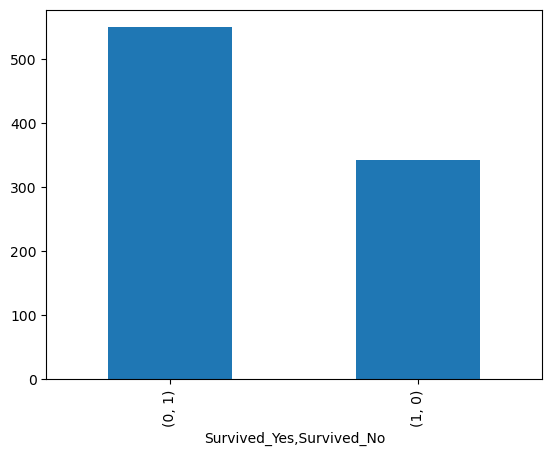

In [57]:
#목표변수 빈도수 현황 확인 : 막대그래프
df_sur = df_titanic.groupby(['Survived_Yes','Survived_No']).size()
df_sur.plot.bar()

<AxesSubplot:ylabel='None'>

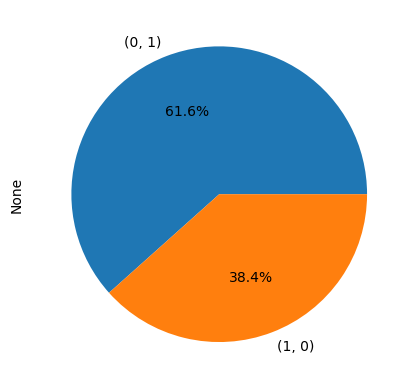

In [58]:
#목표변수 비율확인 : 파이차트
df_sur.plot.pie(autopct="%.1f%%")

<AxesSubplot:ylabel='None'>

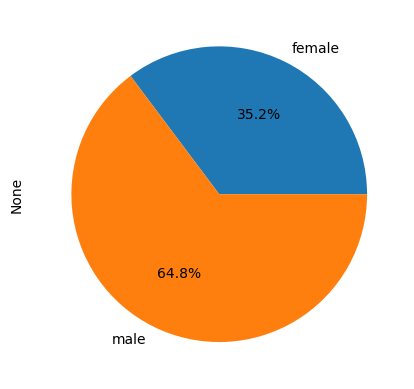

In [60]:
df_sex=df_titanic.groupby(['Sex']).size()
df_sex.plot.pie(autopct="%.1f%%")

<AxesSubplot:ylabel='None'>

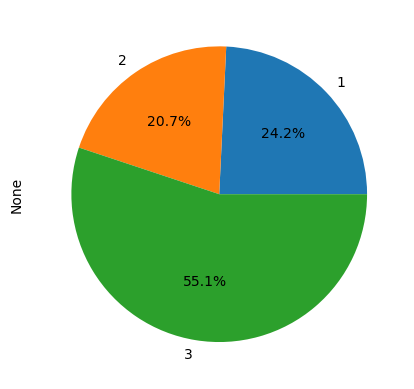

In [61]:
df_class=df_titanic.groupby(['Pclass']).size()
df_class.plot.pie(autopct="%.1f%%")

<AxesSubplot:ylabel='None'>

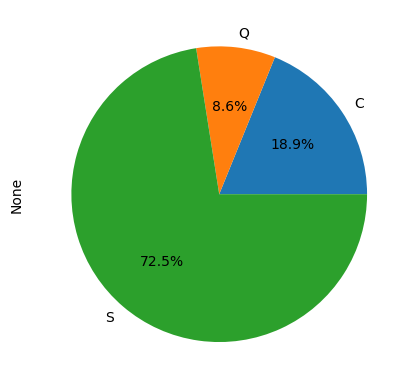

In [62]:
df_embarked=df_titanic.groupby(['Embarked']).size()
df_embarked.plot.pie(autopct="%.1f%%")

In [65]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   PassengerId   891 non-null    int64 
 1   Pclass        891 non-null    int64 
 2   Name          891 non-null    object
 3   Sex           891 non-null    object
 4   Age           891 non-null    object
 5   SibSp         891 non-null    int64 
 6   Parch         891 non-null    int64 
 7   Ticket        891 non-null    object
 8   Fare          891 non-null    int64 
 9   Cabin         891 non-null    object
 10  Embarked      891 non-null    object
 11  Survived_No   891 non-null    uint8 
 12  Survived_Yes  891 non-null    uint8 
 13  Family        891 non-null    int64 
dtypes: int64(6), object(6), uint8(2)
memory usage: 85.4+ KB


# 그래프 분석을 통한 변수 간 관계

In [78]:
df_titanic.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked', 'Survived_No', 'Survived_Yes',
       'Family'],
      dtype='object')

남성보다 여성의 생존율이 더 높다.

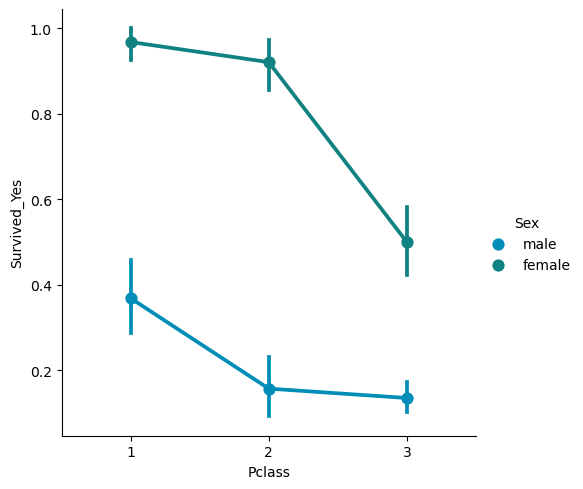

In [70]:
sns.factorplot('Pclass','Survived_Yes', hue='Sex', data=df_titanic, palette='winter_d')

여성의 경우 prime 이상의 그룹이 생존율이 높다<br>
남성의 경우 어린이의 생존율이 더 높다

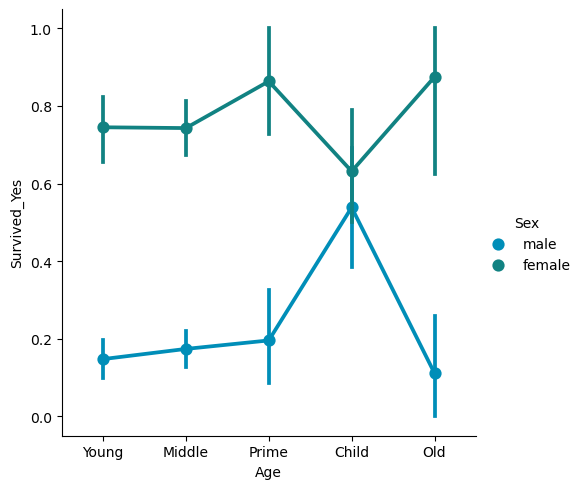

In [73]:
sns.factorplot('Age','Survived_Yes', hue='Sex', data=df_titanic, palette='winter_d')

항구명에 따른 생존율은 유의미하지 않다.

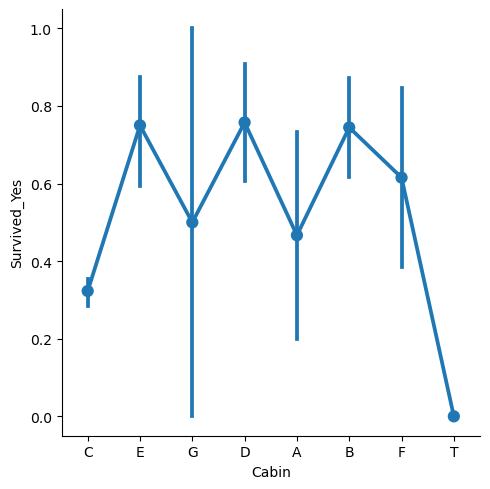

In [74]:
sns.factorplot('Cabin', 'Survived_Yes', data=df_titanic)

여성의 경우, 3구간을 제외하고 티켓요금이 올라갈수록 생존율이 증가한다.<br>
남성의 경우, 4구간을 제외하고 티켓요금이 올라갈수록 생존율이 증가했다.

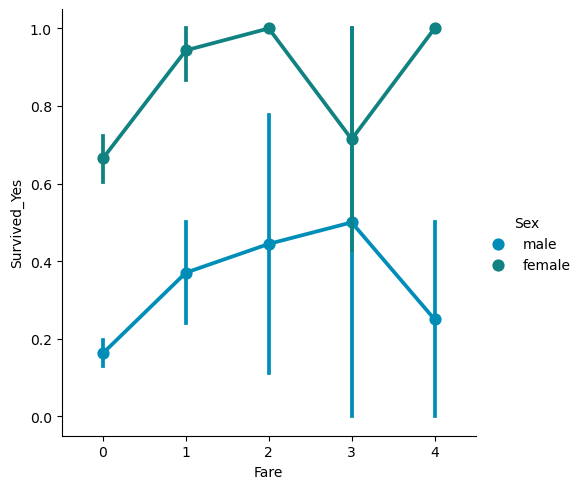

In [75]:
sns.factorplot('Fare','Survived_Yes', hue='Sex', data=df_titanic, palette='winter_d')

가족수가 4인이상이면 생존율이 적다.

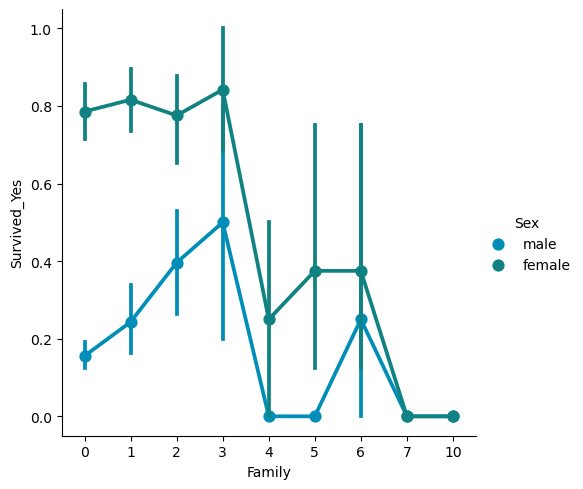

In [76]:
sns.factorplot('Family','Survived_Yes', hue='Sex', data=df_titanic, palette='winter_d')

변수 간의 상관관계를 본다.

In [79]:
df_titanic.corr()

,PassengerId,Pclass,SibSp,Parch,Fare,Survived_No,Survived_Yes,Family
PassengerId,1.000000,-0.035144,-0.057527,-0.001652,0.016176,0.005007,-0.005007,-0.040143
Pclass,-0.035144,1.000000,0.083081,0.018443,-0.537691,0.338481,-0.338481,0.065997
SibSp,-0.057527,0.083081,1.000000,0.414838,0.112517,0.035322,-0.035322,0.890712
Parch,-0.001652,0.018443,0.414838,1.000000,0.161269,-0.081629,0.081629,0.783111
Fare,0.016176,-0.537691,0.112517,0.161269,1.000000,-0.244376,0.244376,0.157469
Survived_No,0.005007,0.338481,0.035322,-0.081629,-0.244376,1.000000,-1.000000,-0.016639
Survived_Yes,-0.005007,-0.338481,-0.035322,0.081629,0.244376,-1.000000,1.000000,0.016639
Family,-0.040143,0.065997,0.890712,0.783111,0.157469,-0.016639,0.016639,1.000000


In [81]:
df1 = df_titanic[['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Survived_No', 'Survived_Yes',
    'Family', 'Fare']]
df1

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Survived_No,Survived_Yes,Family,Fare
0,1,3,Young,1,0,0,1,0,1,0
1,2,1,Middle,1,0,1,0,1,1,1
2,3,3,Young,0,0,0,0,1,0,0
3,4,1,Middle,1,0,1,0,1,1,1
4,5,3,Middle,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
886,887,2,Young,0,0,0,1,0,0,0
887,888,1,Young,0,0,0,0,1,0,0
888,889,3,Middle,1,2,0,1,0,3,0
889,890,1,Young,0,0,0,0,1,0,0


생존에 관계가 있는 변수는 pclass, fare라고 할 수 있다.

<AxesSubplot:>

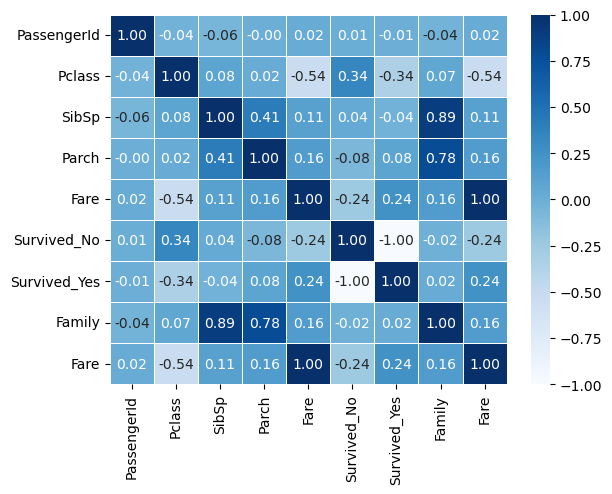

In [83]:
sns.heatmap(data = df1.corr(), annot=True,fmt = '.2f', linewidths=.5, cmap='Blues')

# 층별화

In [84]:
df_titanic['Embarked'] = df_titanic['Embarked'].astype('category')

In [85]:
df_dummies = pd.get_dummies(df_titanic['Embarked'])
df_dummies

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
886,0,0,1
887,0,0,1
888,0,0,1
889,1,0,0


In [86]:
df2 = pd.concat([df_titanic,df_dummies],axis=1)
df2

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived_No,Survived_Yes,Family,C,Q,S
0,1,3,"Braund, Mr. Owen Harris",male,Young,1,0,A/5 21171,0,C,S,1,0,1,0,0,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,Middle,1,0,PC 17599,1,C,C,0,1,1,1,0,0
2,3,3,"Heikkinen, Miss. Laina",female,Young,0,0,STON/O2. 3101282,0,C,S,0,1,0,0,0,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,Middle,1,0,113803,1,C,S,0,1,1,0,0,1
4,5,3,"Allen, Mr. William Henry",male,Middle,0,0,373450,0,C,S,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,"Montvila, Rev. Juozas",male,Young,0,0,211536,0,C,S,1,0,0,0,0,1
887,888,1,"Graham, Miss. Margaret Edith",female,Young,0,0,112053,0,B,S,0,1,0,0,0,1
888,889,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,Middle,1,2,W./C. 6607,0,C,S,1,0,3,0,0,1
889,890,1,"Behr, Mr. Karl Howell",male,Young,0,0,111369,0,C,C,0,1,0,1,0,0


# 기술통계_실습

시내에서 연비 통계치, 고속도로에서 연비 통계치 구하기

In [33]:
ds_mycars = pd.read_csv("/home/piai/python/2주차/실습화일/1 Big Data 분석 기초/mycars.csv")

display(ds_mycars.describe().round(3))

#시내에서의 구동방식별 통계
df = ds_mycars[['cylinder','mpg']]
display(df.groupby('cylinder').describe())

#고속도로에서의 구동방식별 통계
ds = ds_mycars[['cylinder','highway_mileage']]
display(ds.groupby('cylinder').describe())

,displacement,year,cylinder,mpg,highway_mileage
count,234.000,234.00,234.000,234.000,234.000
mean,3.472,2003.50,5.889,16.859,23.440
std,1.292,4.51,1.612,4.256,5.955
min,1.600,1999.00,4.000,9.000,12.000
25%,2.400,1999.00,4.000,14.000,18.000
50%,3.300,2003.50,6.000,17.000,24.000
75%,4.600,2008.00,8.000,19.000,27.000
max,7.000,2008.00,8.000,35.000,44.000


mpg                                                   
         count       mean       std   min   25%   50%   75%   max
cylinder                                                         
4         81.0  21.012346  3.498192  15.0  19.0  21.0  22.0  35.0
5          4.0  20.500000  0.577350  20.0  20.0  20.5  21.0  21.0
6         79.0  16.215190  1.773530  11.0  15.0  16.0  18.0  19.0
8         70.0  12.571429  1.806361   9.0  11.0  13.0  14.0  16.0

highway_mileage                                                    
                   count       mean       std   min    25%   50%   75%   max
cylinder                                                                    
4                   81.0  28.802469  4.515030  20.0  26.00  29.0  31.0  44.0
5                    4.0  28.750000  0.500000  28.0  28.75  29.0  29.0  29.0
6                   79.0  22.822785  3.685590  17.0  19.00  24.0  26.0  29.0
8                   70.0  17.628571  3.262307  12.0  16.00  17.0  19.0  26.0

시내에서의 연비: 4기통 엔진을 사용한 자동차의 평균 연비가 가장 높다. 또한 기통이 증가할수록 평균 연비는 감소하였다. 이것은 기통의 수가 증가할 수록 많은 연료가 필요하다고 할 수 있다. 
<br><br>

고속도로에서의 연비: 4기통 엔진을 사용한 자동차의 평균 연비가 가장 높다. 또한 기통이 증가할수록 평균 연비는 감소하였다. 이것은 기통의 수가 증가할 수록 많은 연료가 필요하다고 할 수 있다.
<br><br>
하지만 고속도로에서의 연비가 시내에서의 연비보다 높은 것을 볼 수 있다. 이것으로 보아, 실린더 수가 낮을수록, 고속도로에서 달릴수록 연비가 높다는 것을 알 수 있다.


# 기술통계_실습

자동차의 모델과 연비에 대한 자료를 조사한 Table이다. <br>
이 범주형 변수인 구동방식, 모델에 대해 counts, percents, cumulative counts, cumulative percents를 계산

In [36]:
df = ds_mycars[['cylinder','model']]

count = df['cylinder'].value_counts().sort_index()
cumcnt = np.cumsum(count)

percent = count/sum(count) * 100
cumpct = np.cumsum(percent)

count_data=pd.DataFrame({'Count':count, 'CumCnt':cumcnt, 'Percent':percent, 'CumPct':cumpct})
count_data.columns.name='cylinder'
print("구동방식에 대한 계산")
display(count_data)

count = df['model'].value_counts().sort_index()
cumcnt = np.cumsum(count)

percent = count/sum(count) * 100
cumpct = np.cumsum(percent)

count_data=pd.DataFrame({'Count':count, 'CumCnt':cumcnt, 'Percent':percent, 'CumPct':cumpct})
count_data.columns.name='model'
print("모델에 대한 계산")
display(count_data)



구동방식에 대한 계산


cylinder,Count,CumCnt,Percent,CumPct
4,81,81,34.615385,34.615385
5,4,85,1.709402,36.324786
6,79,164,33.760684,70.085470
8,70,234,29.914530,100.000000


모델에 대한 계산


model,Count,CumCnt,Percent,CumPct
4runner 4wd,6,6,2.564103,2.564103
a4,7,13,2.991453,5.555556
a4 quattro,8,21,3.418803,8.974359
a6 quattro,3,24,1.282051,10.256410
altima,6,30,2.564103,12.820513
c1500 suburban 2wd,5,35,2.136752,14.957265
camry,7,42,2.991453,17.948718
camry solara,7,49,2.991453,20.940171
caravan 2wd,11,60,4.700855,25.641026
civic,9,69,3.846154,29.487179


구동방식에 대한 퍼센트에이지를 보면, 4기통은 34.6%, 6기통은 33.8%, 8기통은 30%, 5기통은 1.7%로 나타난다.<br>
이는 사람들이 4 > 6 > 8 >> 5기통 순으로 선호하는 것을 알 수 있으며, 5기통이 매우 저조한 것을 알 수 있다.

<br>

모델에 대한 퍼센트에이지를 보면, 대부분의 모델이 골고루 분포해있는 것을 볼 수 있지만, 그 중에서도 caravan 2wd이 4.7% 가장 높다. <br>
그에 반해, land cruiser wagon 4wd가 0.8%로 가장 낮은 것을 볼 수 있다.

# 확률분포_실습(정규분포)
평균 175, 표준편차가 5일때, 나의 키가 180일 경우에 몇 % 범위일까

In [42]:
avg = 175
sigma = 5
x = 180

prob = stats.norm.cdf(x, avg, sigma)
print("나의 키는 {0} 퍼센트에 속합니다.".format((1-prob)*100))

나의 키는 15.865525393145708 퍼센트에 속합니다.


어떤 자동차가 1리터당 주행거리가 평균 12km, 표준편차 3km인 정규분포를 이룬다.<br>
1) 1리터를 가지고 9km 이상 15km 이하를 달릴 확률은? <br>
2) 1리터를 가지고 15km 이상을 달릴 확률은?

In [46]:
avg = 12
sigma = 3

p1 = stats.norm.cdf(15, avg, sigma) - stats.norm.cdf(9, avg, sigma)
print("1리터를 가지고 9km 이상 15km 이하를 달릴 확률:", p1)

p2 = 1 - stats.norm.cdf(15, avg, sigma)
print("1리터를 가지고 15km 이상을 달릴 확률:", p2)


1리터를 가지고 9km 이상 15km 이하를 달릴 확률: 0.6826894921370859
1리터를 가지고 15km 이상을 달릴 확률: 0.15865525393145707


# 확률분포_실습(t 분포)
확률 변수는 t가 자유도 100인 t-분포를 따른다. <br>
t 값이 2.0일때, P (T <= t)을 계산하시오

In [47]:
t = 2.0
df = 100

prob = stats.t.cdf(t, df)
print("P(T<=t) : {:.3f}".format(prob))

P(T<=t) : 0.976


# 확률분포_실습(x^2 분포)
확률 변수 x^2는 자유도 8인 x^2- 분포를 따른다. <br>
x^2 값이 3.0일때, P(X<=x^2)을 계산하시오.

In [49]:
chisq = 3.0
df = 8

prob = stats.chi2.cdf(chisq, df)
print("P(X<={0}) : {1:.4f}".format(chisq,prob))

P(X<=3.0) : 0.0656


# 확률분포_실습(F-분포)
확률변수 F는 각각 자유도가 10, 100인 F-분포를 따른다.<br>
F 값이 1.5 일때, P (X<=F)을 계산하시오.

In [87]:
f = 1.5
dfnum = 10
dfden = 100

prob = stats.f.cdf(x=f, dfn = dfnum, dfd = dfden)
print("P(X<=F): {:.3f}".format(prob))

P(X<=F): 0.850
